<a href="https://colab.research.google.com/github/Beard31/Deep-Dive-Data-Science-Projects/blob/main/Spotify_Popularity_Prediction_Beard_Final_Draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## Project 4: Music Popularity Prediction


This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.

The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The hyperparameters of the trees should be carefully selected to avoid over-fitting.

State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

## Data Collection/Sources


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.cloud import bigquery

In [105]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: wq+O/yM6o86WxZki+xPsOOZ63nK7nzKEmMcNdhXoQlw4Elch6u1IYFNcDbAxY0uO3CQ/PDWpxTc=
x-amz-request-id: 4511VBY3D83BYXKB
Date: Sat, 01 Mar 2025 21:28:38 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [106]:
!curl -s -O {url}

In [107]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Mar  1 21:13 ./
drwxr-xr-x 1 root root   4096 Mar  1 21:12 ../
drwxr-xr-x 4 root root   4096 Feb 27 14:21 .config/
drwxr-xr-x 1 root root   4096 Feb 27 14:22 sample_data/
-rw-r--r-- 1 root root 738124 Mar  1 21:28 Spotify.csv


In [108]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


In [109]:
df = pd.read_csv(url)
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [110]:
df_copy = df.copy()

In [111]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [112]:
df_copy.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [113]:
df_copy.isnull().sum()

,0
Index,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Song Name,0
Streams,0
Artist,0
Artist Followers,0
Song ID,0
Genre,0


## Data Cleaning


In [114]:
df_copy.drop_duplicates(inplace=True)
df_copy.duplicated().sum()

0

In [115]:
df_copy.shape

(1556, 23)

In [116]:
for col in df_copy.columns:
  if pd.api.types.is_string_dtype(df_copy[col]):
    whitespace_count = df_copy[col].str.contains(r'\s', regex=True, na=False).sum()
    if whitespace_count > 0:
        print(f"Column '{col}' has {whitespace_count} values with whitespace")

Column 'Song Name' has 1169 values with whitespace
Column 'Artist' has 1228 values with whitespace
Column 'Artist Followers' has 11 values with whitespace
Column 'Song ID' has 11 values with whitespace
Column 'Genre' has 1448 values with whitespace
Column 'Release Date' has 11 values with whitespace
Column 'Weeks Charted' has 1047 values with whitespace
Column 'Popularity' has 11 values with whitespace
Column 'Danceability' has 11 values with whitespace
Column 'Energy' has 11 values with whitespace
Column 'Loudness' has 11 values with whitespace
Column 'Speechiness' has 11 values with whitespace
Column 'Acousticness' has 11 values with whitespace
Column 'Liveness' has 11 values with whitespace
Column 'Tempo' has 11 values with whitespace
Column 'Duration (ms)' has 11 values with whitespace
Column 'Valence' has 11 values with whitespace
Column 'Chord' has 11 values with whitespace


In [117]:
df_copy.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [118]:
# Gets rid of special cases and white spaces

df_clean1 = df_copy.replace(r'[\s, _-]+', '', regex=True).applymap(
    lambda x: int(x) if isinstance(x, float) and x.is_integer() else x
)
df_clean1.head()

<ipython-input-118-e9d03667025f>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean1 = df_copy.replace(r'[\s, _-]+', '', regex=True).applymap(


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021072320210730,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,['indierockitaliano''italianpop'],...,0.714,0.8,4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021072320210730,STAY(withJustinBieber),47248719,TheKidLAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australianhiphop'],...,0.591,0.764,5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021062520210702,good4u,40162559,OliviaRodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021070220210709,BadHabits,37799456,EdSheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,['pop''ukpop'],...,0.808,0.897,3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021072320210730,INDUSTRYBABY(feat.JackHarlow),33948454,LilNasX,5473565,27NovPIUIRrOZoCHxABJwK,['lgbtq+hiphop''poprap'],...,0.736,0.704,7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [119]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [120]:
# multiply object files by 100000

# Assuming 'object' columns are those with dtype 'object' in your DataFrame
object_columns = df_clean1.select_dtypes(include=['object']).columns

# Multiply values in object columns (if possible) by 100000
for col in object_columns:
    try:
      # Attempt to convert to numeric first. If successful, perform the multiplication.
      df_clean1[col] = pd.to_numeric(df_clean1[col], errors='coerce')
      df_clean1[col] = df_clean1[col].fillna(0) * 100000
      # Handle potential errors (e.g., non-numeric values) gracefully.
    except (ValueError, TypeError):
        print(f"Column '{col}' contains non-numeric values and cannot be multiplied.")

df_clean1.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,-806952789732067776,0.0,4863344900000,0.0,3.377762e+11,0.0,0.0,...,71400.0,80000.0,480800.0,5040.0,12700.0,35900.0,13400200.0,2.115600e+10,58900.0,0.0
1,2,2,3,-806952789732067776,0.0,4724871900000,0.0,2.230022e+11,0.0,0.0,...,59100.0,76400.0,548400.0,4830.0,3830.0,10300.0,16992800.0,1.418060e+10,47800.0,0.0
2,3,1,11,-807932789734867776,0.0,4016255900000,0.0,6.266514e+11,0.0,0.0,...,56300.0,66400.0,504400.0,15400.0,33500.0,8490.0,16692800.0,1.781470e+10,68800.0,0.0
3,4,3,5,-807162789734167776,0.0,3779945600000,0.0,8.329338e+12,0.0,0.0,...,80800.0,89700.0,371200.0,3480.0,4690.0,36400.0,12602600.0,2.310410e+10,59100.0,0.0
4,5,5,1,-806952789732067776,0.0,3394845400000,0.0,5.473565e+11,0.0,0.0,...,73600.0,70400.0,740900.0,6150.0,2030.0,5010.0,14999500.0,2.120000e+10,89400.0,0.0


In [121]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   int64  
 4   Song Name                  1556 non-null   float64
 5   Streams                    1556 non-null   int64  
 6   Artist                     1556 non-null   float64
 7   Artist Followers           1556 non-null   float64
 8   Song ID                    1556 non-null   float64
 9   Genre                      1556 non-null   float64
 10  Release Date               1556 non-null   float64
 11  Weeks Charted              1556 non-null   float64
 12  Popularity                 1556 non-null   float64
 13  Danceability               1556 non-null   float

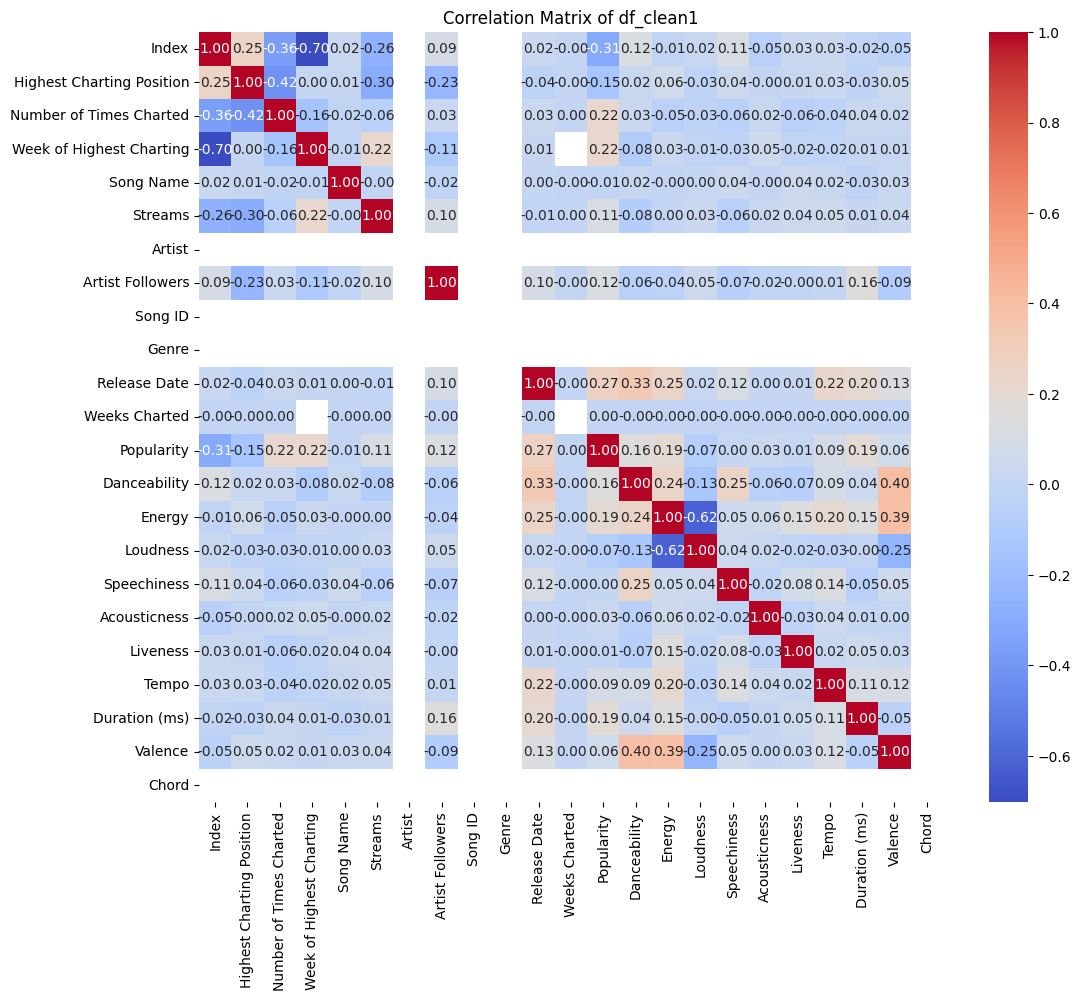

In [122]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df_clean1')
plt.show()

- Highest Charting Position, Week of Highest Charting, Streams, Artist Followeres, Release Date, Danceability and Energy are highly corralated with Popularity.

In [123]:
# drop Index, Highest Charting Position, Number of Times Charted, Week of Highest Charting, Song Name, Streams, Release Date, Popularity, Weeks charted from df_clean1

columns_to_drop = ['Index', 'Highest Charting Position', 'Number of Times Charted',
                   'Week of Highest Charting', 'Song Name', 'Streams', 'Release Date',
                   'Popularity', 'Weeks Charted','Danceability','Energy']

# Check if columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in df_clean1.columns]

if columns_to_drop:
    df_clean1 = df_clean1.drop(columns=columns_to_drop)


In [124]:
# # turn all floats in df_clean1 into int

# # Iterate through each column in the DataFrame
# for col in df_clean1.columns:
#     # Check if the column's data type is float
#     if df_clean1[col].dtype == 'float64':
#         # Attempt to convert the column to integers
#         try:
#             df_clean1[col] = df_clean1[col].astype(int)
#         except ValueError:
#             # Handle cases where conversion to int is not possible (e.g., NaN values)
#             print(f"Could not convert column '{col}' to integers due to non-integer float values.")
#             # Optionally, you can fill NaN values or handle them differently
#             # For example:
#             # df_clean1[col] = df_clean1[col].fillna(0).astype(int)

In [125]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            1556 non-null   float64
 1   Artist Followers  1556 non-null   float64
 2   Song ID           1556 non-null   float64
 3   Genre             1556 non-null   float64
 4   Loudness          1556 non-null   float64
 5   Speechiness       1556 non-null   float64
 6   Acousticness      1556 non-null   float64
 7   Liveness          1556 non-null   float64
 8   Tempo             1556 non-null   float64
 9   Duration (ms)     1556 non-null   float64
 10  Valence           1556 non-null   float64
 11  Chord             1556 non-null   float64
dtypes: float64(12)
memory usage: 146.0 KB


In [126]:
df_clean1.head()

,Artist,Artist Followers,Song ID,Genre,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,0.0,3.377762e+11,0.0,0.0,480800.0,5040.0,12700.0,35900.0,13400200.0,2.115600e+10,58900.0,0.0
1,0.0,2.230022e+11,0.0,0.0,548400.0,4830.0,3830.0,10300.0,16992800.0,1.418060e+10,47800.0,0.0
2,0.0,6.266514e+11,0.0,0.0,504400.0,15400.0,33500.0,8490.0,16692800.0,1.781470e+10,68800.0,0.0
3,0.0,8.329338e+12,0.0,0.0,371200.0,3480.0,4690.0,36400.0,12602600.0,2.310410e+10,59100.0,0.0
4,0.0,5.473565e+11,0.0,0.0,740900.0,6150.0,2030.0,5010.0,14999500.0,2.120000e+10,89400.0,0.0


In [127]:
for col in df_clean1.columns:
  if pd.api.types.is_string_dtype(df_clean1[col]):
    whitespace_count = df_copy[col].str.contains(r'\s', regex=True, na=False).sum()
    if whitespace_count > 0:
        print(f"Column '{col}' has {whitespace_count} values with whitespace")

In [128]:
# drop all columns with 0 in them

for col in df_clean1.columns:
    if (df_clean1[col] == 0).all():
        df_clean1 = df_clean1.drop(col, axis=1)
        print(f"Column '{col}' has been dropped.")
    else:
        print(f"Column '{col}' contains non-zero values.")



Column 'Artist' has been dropped.
Column 'Artist Followers' contains non-zero values.
Column 'Song ID' has been dropped.
Column 'Genre' has been dropped.
Column 'Loudness' contains non-zero values.
Column 'Speechiness' contains non-zero values.
Column 'Acousticness' contains non-zero values.
Column 'Liveness' contains non-zero values.
Column 'Tempo' contains non-zero values.
Column 'Duration (ms)' contains non-zero values.
Column 'Valence' contains non-zero values.
Column 'Chord' has been dropped.


In [129]:
df_clean1.head()

,Artist Followers,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,3.377762e+11,480800.0,5040.0,12700.0,35900.0,13400200.0,2.115600e+10,58900.0
1,2.230022e+11,548400.0,4830.0,3830.0,10300.0,16992800.0,1.418060e+10,47800.0
2,6.266514e+11,504400.0,15400.0,33500.0,8490.0,16692800.0,1.781470e+10,68800.0
3,8.329338e+12,371200.0,3480.0,4690.0,36400.0,12602600.0,2.310410e+10,59100.0
4,5.473565e+11,740900.0,6150.0,2030.0,5010.0,14999500.0,2.120000e+10,89400.0


In [130]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Followers  1556 non-null   float64
 1   Loudness          1556 non-null   float64
 2   Speechiness       1556 non-null   float64
 3   Acousticness      1556 non-null   float64
 4   Liveness          1556 non-null   float64
 5   Tempo             1556 non-null   float64
 6   Duration (ms)     1556 non-null   float64
 7   Valence           1556 non-null   float64
dtypes: float64(8)
memory usage: 97.4 KB


In [131]:
df_clean1.describe()

,Artist Followers,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1.556000e+03,1.556000e+03,1556.000000,1.556000e+03,1556.000000,1.556000e+03,1.556000e+03,1556.000000
mean,1.461286e+12,6.305533e+05,12278.155527,4.109153e+07,17992.140103,1.219428e+07,1.965415e+10,51106.516710
std,1.666242e+12,2.551581e+05,11047.876705,1.168224e+09,14436.151810,3.123103e+06,4.982468e+09,23059.089927
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.990790e+11,4.668000e+05,4512.500000,4.747500e+03,9557.500000,9.701950e+06,1.687285e+10,34000.000000
50%,6.852509e+11,5.955000e+05,7495.000000,1.595000e+04,12350.000000,1.219550e+07,1.933035e+10,51050.000000
75%,2.253630e+12,7.481500e+05,16400.000000,3.872500e+04,21525.000000,1.431778e+07,2.187660e+10,69000.000000
max,8.333778e+12,2.516600e+06,88400.000000,3.840000e+10,96200.000000,2.052720e+07,5.881390e+10,97900.000000


In [132]:
df_clean1.shape

(1556, 8)

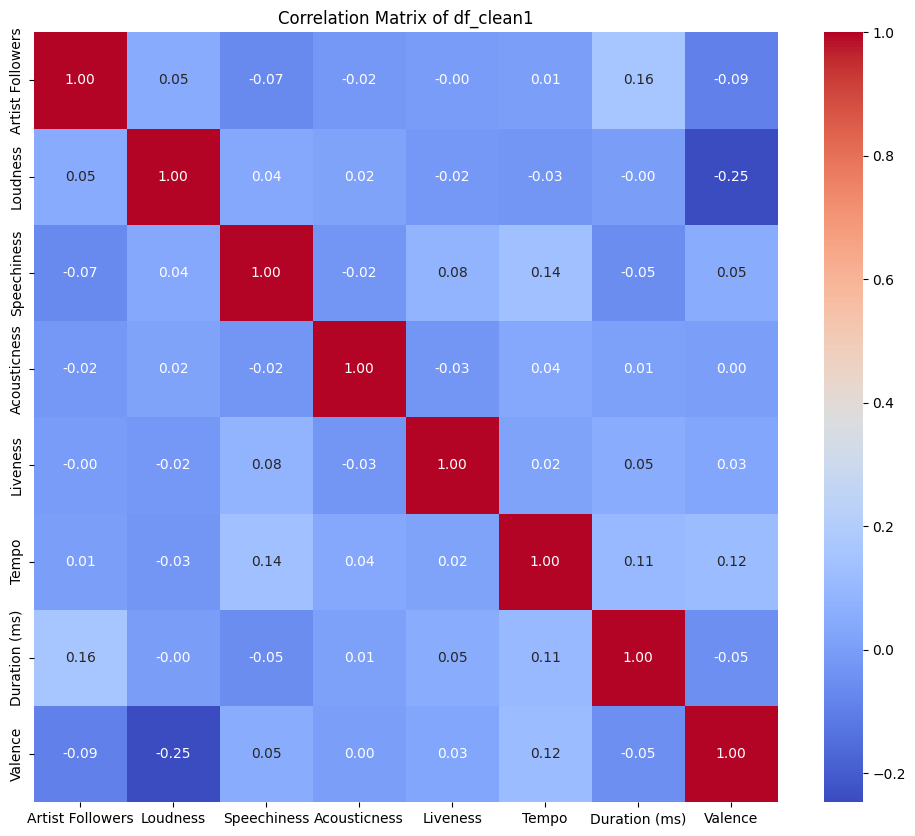

In [133]:
# corr plot of df_clean1

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df_clean1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df_clean1')
plt.show()


## Exploratory Data Analysis


## Processing


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [135]:
# split into target and Features

# Define features (X) and target (y)
X = df_clean1.drop('Artist Followers', axis=1)  # Features are all columns except 'Popularity'
y = df_clean1['Artist Followers']  # Target variable is 'Popularity'
# X = df_clean1.drop('Duration (ms)', axis=1)  # Features are all columns except 'Popularity'
# y = df_clean1['Duration (ms)']  # Target variable is 'Popularity'



In [139]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Number of iterations for CV
n = 500
results = np.zeros(n)

for idx in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    # Train model
    # model = LinearRegression()
    model = DecisionTreeRegressor(random_state=50)
    # model = RandomForestRegressor(n_estimators=10, random_state=10)
    model.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred = model.predict(X_test)
    results[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"CV RMSE: {results.mean():.2f}")
print(f"Number of Predictors: {X.shape[1]}")

CV RMSE: 2308267620447.50
Number of Predictors: 7


## Data Visualization/Communication of Results
